In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('D:\DS\DataSets\disney_plus_titles.csv')

## Getting basic details of data

In [112]:
df.shape

(1450, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [114]:
df.columns = map(str.capitalize,df.columns)
df.head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [115]:
df.isnull().sum()

Show_id           0
Type              0
Title             0
Director        473
Cast            190
Country         219
Date_added        3
Release_year      0
Rating            3
Duration          0
Listed_in         0
Description       0
dtype: int64

In [116]:
# Description, Director and cast is not required so dropping those columns
df.drop(columns = ['Description','Director','Cast'], inplace = True)
df.head()

,Show_id,Type,Title,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family"
1,s2,Movie,Ernest Saves Christmas,NaN,"November 26, 2021",1988,PG,91 min,Comedy
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family"
3,s4,Movie,The Queen Family Singalong,NaN,"November 26, 2021",2021,TV-PG,41 min,Musical
4,s5,TV Show,The Beatles: Get Back,NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music"


In [117]:
# Dropping the Nan values in country
df.dropna(subset = ['Country'],inplace = True)
df.head()

,Show_id,Type,Title,Country,Date_added,Release_year,Rating,Duration,Listed_in
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family"
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary"
7,s8,TV Show,Port Protection Alaska,United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival"
8,s9,TV Show,Secrets of the Zoo: Tampa,United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
9,s10,Movie,A Muppets Christmas: Letters To Santa,United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical"


In [118]:
# getting Month and Year from added_date for our analysis
df['Added_year'] = pd.to_datetime(df['Date_added']).dt.year
df['Added_Month'] = pd.to_datetime(df['Date_added']).dt.month

In [119]:
# after extracted the year and month dropping that column
df.drop(columns = 'Date_added',inplace = True)

In [120]:
# Function to convert the duration in minutes, for seasons i'm assuming as 10 episodes for each season and each episode is 30 Mins long
def Dur(duration):
    ls = duration.split()
    if ls[1] == 'min':
        return int(ls[0])
    elif ls[1] == 'Seasons' or ls[1] == 'Season':
        return (int(ls[0]) * 10 * 30)
    else:
        return duration

In [121]:
df.Duration = df['Duration'].apply(lambda x : Dur(x))
df.head()

,Show_id,Type,Title,Country,Release_year,Rating,Duration,Listed_in,Added_year,Added_Month
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23,"Animation, Comedy, Family",2021.0,11.0
5,s6,Movie,Becoming Cousteau,United States,2021,PG-13,94,"Biographical, Documentary",2021.0,11.0
7,s8,TV Show,Port Protection Alaska,United States,2015,TV-14,600,"Docuseries, Reality, Survival",2021.0,11.0
8,s9,TV Show,Secrets of the Zoo: Tampa,United States,2019,TV-PG,600,"Animals & Nature, Docuseries, Family",2021.0,11.0
9,s10,Movie,A Muppets Christmas: Letters To Santa,United States,2008,G,45,"Comedy, Family, Musical",2021.0,11.0


In [122]:
df.rename(columns = {'Duration':'Duration(Min)'}, inplace = True)
df.head()

,Show_id,Type,Title,Country,Release_year,Rating,Duration(Min),Listed_in,Added_year,Added_Month
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23,"Animation, Comedy, Family",2021.0,11.0
5,s6,Movie,Becoming Cousteau,United States,2021,PG-13,94,"Biographical, Documentary",2021.0,11.0
7,s8,TV Show,Port Protection Alaska,United States,2015,TV-14,600,"Docuseries, Reality, Survival",2021.0,11.0
8,s9,TV Show,Secrets of the Zoo: Tampa,United States,2019,TV-PG,600,"Animals & Nature, Docuseries, Family",2021.0,11.0
9,s10,Movie,A Muppets Christmas: Letters To Santa,United States,2008,G,45,"Comedy, Family, Musical",2021.0,11.0


In [123]:
# grouping to find maximum added year to fill Nan values
df.groupby('Added_year',dropna = True).count() # 2019 is Maximum Added Year

,Show_id,Type,Title,Country,Release_year,Rating,Duration(Min),Listed_in,Added_Month
Added_year,,,,,,,,,
2019.0,730,730,730,730,730,730,730,730,730
2020.0,310,310,310,310,310,310,310,310,310
2021.0,188,188,188,188,188,188,188,188,188


In [124]:
# grouping to find maximum added Month to fill Nan values
df.groupby('Added_Month',dropna = True).count() # November is Maximum added Month

,Show_id,Type,Title,Country,Release_year,Rating,Duration(Min),Listed_in,Added_year
Added_Month,,,,,,,,,
1.0,52,52,52,52,52,52,52,52,52
2.0,35,35,35,35,35,35,35,35,35
3.0,15,15,15,15,15,15,15,15,15
4.0,71,71,71,71,71,71,71,71,71
5.0,46,46,46,46,46,46,46,46,46
6.0,45,45,45,45,45,45,45,45,45
7.0,46,46,46,46,46,46,46,46,46
8.0,37,37,37,37,37,37,37,37,37
9.0,44,44,44,44,44,44,44,44,44


In [125]:
# Changing the data types and now we got cleaned and Not null value data
df['Added_year'].fillna(2019,inplace = True)
df['Added_Month'].fillna(11, inplace = True)
df['Added_year'] = df['Added_year'].astype(int)
df['Added_Month'] = df['Added_Month'].astype(int)
df['Duration(Min)'] = df['Duration(Min)'].astype(int) 
df.isna().sum()

Show_id          0
Type             0
Title            0
Country          0
Release_year     0
Rating           0
Duration(Min)    0
Listed_in        0
Added_year       0
Added_Month      0
dtype: int64

In [126]:
df['Show_id'] = df['Show_id'].apply(lambda x : x[-1])
df['Show_id'] = df['Show_id'].astype(int)
df.head()

,Show_id,Type,Title,Country,Release_year,Rating,Duration(Min),Listed_in,Added_year,Added_Month
2,3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23,"Animation, Comedy, Family",2021,11
5,6,Movie,Becoming Cousteau,United States,2021,PG-13,94,"Biographical, Documentary",2021,11
7,8,TV Show,Port Protection Alaska,United States,2015,TV-14,600,"Docuseries, Reality, Survival",2021,11
8,9,TV Show,Secrets of the Zoo: Tampa,United States,2019,TV-PG,600,"Animals & Nature, Docuseries, Family",2021,11
9,0,Movie,A Muppets Christmas: Letters To Santa,United States,2008,G,45,"Comedy, Family, Musical",2021,11


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 2 to 1449
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Show_id        1231 non-null   int32 
 1   Type           1231 non-null   object
 2   Title          1231 non-null   object
 3   Country        1231 non-null   object
 4   Release_year   1231 non-null   int64 
 5   Rating         1231 non-null   object
 6   Duration(Min)  1231 non-null   int32 
 7   Listed_in      1231 non-null   object
 8   Added_year     1231 non-null   int32 
 9   Added_Month    1231 non-null   int32 
dtypes: int32(4), int64(1), object(5)
memory usage: 86.6+ KB


# Plotting

In [128]:
df_line = df.groupby('Release_year').sum('Title')
df_line.head()

,Show_id,Duration(Min),Added_year,Added_Month
Release_year,,,,
1928,1,8,2019,11
1932,20,23,6057,33
1933,20,26,6057,33
1934,15,35,8076,44
1935,8,39,8077,37


In [129]:
df1 = df[df['Type'] == 'Movie']
df2 = df[df['Type'] == 'TV Show']

In [130]:
df_mov = df1.groupby('Release_year').count()
df_tv = df2.groupby('Release_year').count()

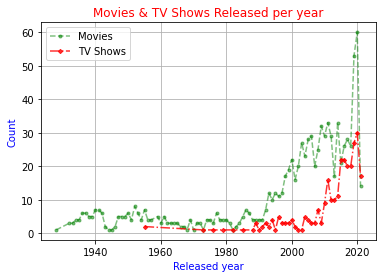

In [131]:
plt.title('Movies & TV Shows Released per year',color = 'r')
plt.xlabel('Released year', color = 'b')
plt.ylabel('Count', color = 'b')
plt.plot(df_mov.index, df_mov['Type'], 'go--', alpha = 0.5,markersize = 3,label = 'Movies')
plt.plot(df_tv.index, df_tv['Type'], 'rD-.',alpha = 0.8,markersize = 3, label = 'TV Shows')
plt.legend()
plt.grid()
plt.show()

In [132]:
df_pie = df.groupby('Added_year').sum('Title')
df_pie.head()

,Show_id,Release_year,Duration(Min),Added_Month
Added_year,,,,
2019,3317,1462395,124779,8075
2020,1386,622101,64201,1913
2021,839,378061,90841,1223


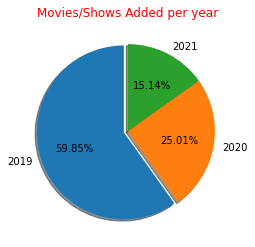

In [133]:
plt.title('Movies/Shows Added per year',color = 'r')
plt.pie(df_pie['Show_id'],
        labels = df_pie.index,
        autopct = '%0.2f%%',
        shadow = True,
       startangle = 90,
       explode = [0.05,0,0])
plt.show()

In [134]:
bar = df.groupby('Type').count()
bar

,Show_id,Title,Country,Release_year,Rating,Duration(Min),Listed_in,Added_year,Added_Month
Type,,,,,,,,,
Movie,946,946,946,946,946,946,946,946,946
TV Show,285,285,285,285,285,285,285,285,285


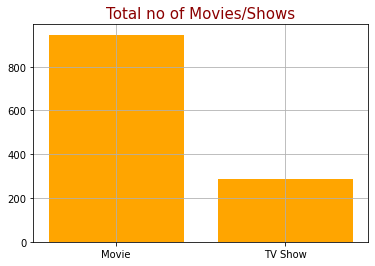

In [135]:
plt.title('Total no of Movies/Shows',color = 'darkred',fontsize = 15)
plt.bar(
        bar.index,
        height = bar['Show_id'],
       color = 'orange',
       )
plt.grid()
plt.show()